# <span style="color:red"> NUMERICAL EXERCISES 07</span>

###### MD SIMULATION OF LJ MODEL OF ARGON, 108 MOLECULES ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu)

This Jupyter Notebook aims to simulate the same system as in exercise 4, but with the Metropolis algorithm (MC simulation).
I recall the three argon phases to be simulated

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

## <span style="color:blue">Exercise 07.1</span>

It is just an integration into the C++ MD/MC code (tail corrections).

## <span style="color:blue">Exercise 07.2</span>

###### EQUILIBRATION
First we need to balance the system in the three phases.
I recall that for the MD simulation the equilibration times found were: \
\- 4,000 moves per liquid and solid phase; \
\- 60,000 moves per gas phase; \
where by move I mean a Velvet step.

It seems reasonable to me, to equilibrate this MC simulation, to consider a similar number of moves, and thus evaluate 50,000 non-progressive estimates of $U/N_{part}$, (N = 50,000 blocks of L = 1 step). I then make some plots to estimate the equilibration time for the three steps by eye.

Results:
- solid phase: plot for 1,000, 10,000 moves. For balancing, I choose a time of 1,000 moves; 
- liquid phase: plot for 1,000, 10,000 moves. Slightly slower. 2,000 moves seems sufficient;
- gas phase: plot for 1,000, 10,000, 50,000 moves. Definitely not enough 1,000 moves, and it seems not even with 10,000. I choose for safety a balancing time of 50,000 moves.

OSS: The values obtained are very similar to those in MD, partly due to the fact that gas takes longer to equilibrate. Perhaps the estimate for gas equilibration is exaggerated (for both MD and MC), and I may have been misled by the fact that for gas, as seen from the 10,000-move graphs, the U/N value oscillates 'more slowly' than for the other two phases (gas will probably have a longer correlation time). To be on the safe side, I will use the values written above anyway.

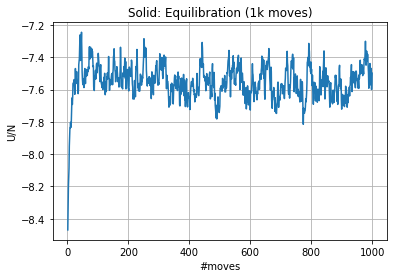

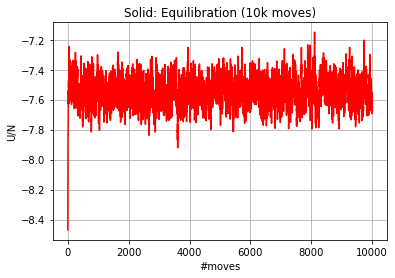

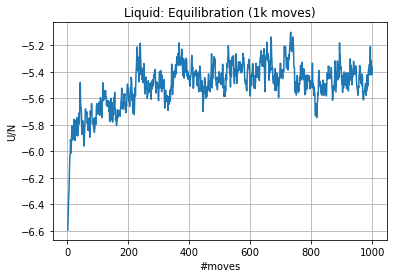

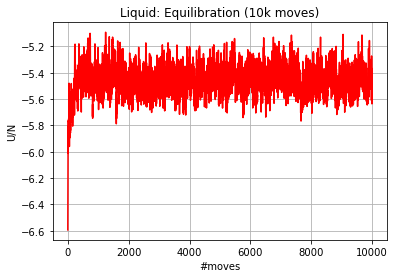

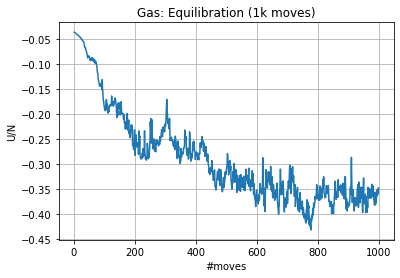

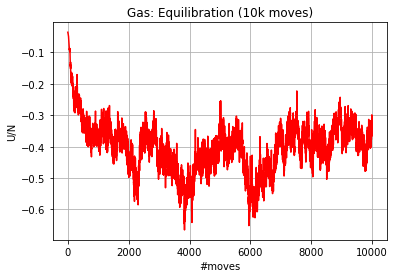

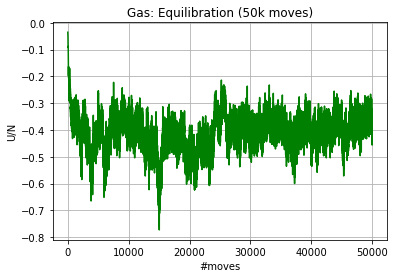

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 1000
N1 = 10000

#solid

n, stima_temp, a, d = np.loadtxt("data/eq_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:N]
y = stima_temp[:N]
plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Solid: Equilibration (1k moves)')
plt.grid(True)

plt.figure()
x = n[:N1]
y = stima_temp[:N1]
plt.plot(x,y, color='r')
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Solid: Equilibration (10k moves)')
plt.grid(True)
#liquid

plt.figure()
n, stima_temp, a, d = np.loadtxt("data/eq_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:N]
y = stima_temp[:N]
plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Liquid: Equilibration (1k moves)')
plt.grid(True)

plt.figure()
x = n[:N1]
y = stima_temp[:N1]
plt.plot(x,y, color='r')
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Liquid: Equilibration (10k moves)')
plt.grid(True)

#gas

plt.figure()
n, stima_temp, a, d = np.loadtxt("data/eq_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:N]
y = stima_temp[:N]
plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Gas: Equilibration (1k moves)')
plt.grid(True)

plt.figure()
x = n[:N1]
y = stima_temp[:N1]
plt.plot(x,y, color='r')
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Gas: Equilibration (10k moves)')
plt.grid(True)

plt.figure()
plt.plot(n, stima_temp, color='g')
plt.xlabel('#moves')
plt.ylabel('U/N')
plt.title('Gas: Equilibration (50k moves)')
plt.grid(True)


plt.show()

###### AUTOCORRELATION

Now that equilibration time has been found, one would like to start the simulation. However, before beginning, I must solve the autocorrelation problem, whereby measurements of immediately successive configurations are not independent. The reason the problem arises is obvious: moves that perturb the system little will produce similar configurations and therefore correlated measurements. \
To collect uncorrelated measurements and at the same time not throw away data, the data blocking method is used, cunningly choosing the number of steps per block so that the block duration exceeds, say doubles, the maximum correlation time.

I calculate the autocorrelation of potential energy $U/N_{part}$ (that I shall label simply as $U$) over a MC-steps-range from zero (after equilibration) to $N=5×10^5$ (one-step-blocks).
The autocorrelation is given by:

$$ \chi_{U} (t) = \frac{ \langle U(t) \space U(t+t')\rangle_t' - \langle U\rangle} {\sigma(U)^2} $$


Recalling that the time steps are discrete, I can assume $t=n$, where $n$ is the number of blocks (ranging from 0 to N). The formula above becomes: 

$$\chi_U (n) = \frac N {N-n}  \frac{\sum_{n'=1,N-n}U(n')U(n+n')-\frac 1 {N-n}\left(\sum_{n'=1,N-n}U(n')\right)\left(\sum_{n'=1,N-n}U(n+n')\right)}{\sum_{n'=1,N}U^2(n') - \frac 1 N \left(\sum_{n'=1,N}U(n')\right)^2}$$

I shall compute and plot this quantity and see, by eye, for what n it approaches zero. This n is a good estimation of correlation time.


Results: For the liquid and solid phase, autocorrelation stabilizes at low values after a few hundred moves.
The gas phase, for which more points are plotted, seems to have some problems, because it fluctuates more around zero. Anyway, the autocorrelation that may worry is the positive one (which says that two successive configurations are 'similar'), while the negative one (which says that two successive configurations are 'almost opposite') is not a problem: the fact that for gas the autocorrelation fluctuates between -0.2 and 0.2 should therefore be interpreted as a statistical fluctuation. Therefore, I can consider also for the gas an autocorrelation time of few hundreds moves (the first zero of the plot is around after 400 moves).

33.3% done
66.7% done


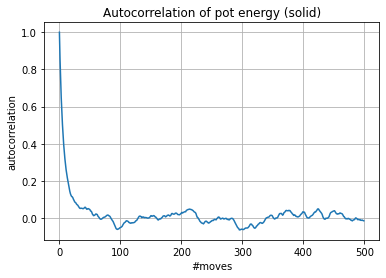

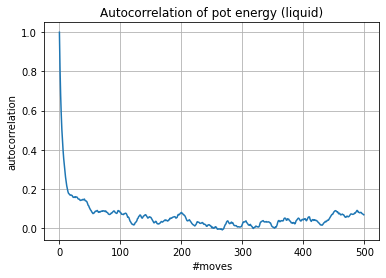

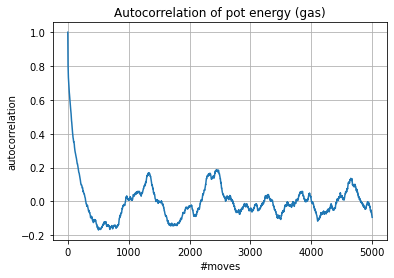

<Figure size 432x288 with 0 Axes>

In [2]:
#WARNING: Execution will take 2 minutes and it doesn't use all the 50,000 data, but only 10,000

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# autocorrelation function
def ac(N,n,U):
    k=N/(N-n)
    somma1=0
    somma2=0
    somma3=0
    for i in range(N-n):
        somma1 = somma1 + U[i]*U[i+n]
        somma2 = somma2 + U[i]
        somma3 = somma3 + U[i+n]
    num = somma1-(somma2*somma3/((N-n)))
    somma4=0
    somma5 = 0
    for i in range(N):
        somma4 = somma4 + U[i]**2
        somma5 = somma5 + U[i]
    den = somma4 - somma5**2/(N)
    return k*num/den

#solid 
N = 10000
Plotted = 500
n, U = np.loadtxt("data/epot_solid.dat", usecols =(0, 1), unpack = 'true')
x = np.arange(Plotted)
y=np.zeros(Plotted)
U = U[:N]

for j in range(Plotted):
    y[j] = ac(N,x[j],U)

plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('autocorrelation')
plt.title('Autocorrelation of pot energy (solid)')
plt.grid(True)
plt.figure()

print("33.3% done")

#liquid
N = 10000
Plotted = 500
n, U = np.loadtxt("data/epot_liquid.dat", usecols =(0, 1), unpack = 'true')
x = np.arange(Plotted)
y=np.zeros(Plotted)
U = U[:N]

for j in range(Plotted):
    y[j] = ac(N,x[j],U)

plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('autocorrelation')
plt.title('Autocorrelation of pot energy (liquid)')
plt.grid(True)
plt.figure()

print("66.7% done")

#gas
N = 10000
Plotted = 5000
n, U = np.loadtxt("data/epot_gas.dat", usecols =(0, 1), unpack = 'true')
x = np.arange(Plotted)
y=np.zeros(Plotted)
U = U[:N]

for j in range(Plotted):
    y[j] = ac(N,x[j],U)

plt.plot(x,y)
plt.xlabel('#moves')
plt.ylabel('autocorrelation')
plt.title('Autocorrelation of pot energy (gas)')
plt.grid(True)
plt.figure()

plt.show()

#WARNING: Execution will take 2 minutes and it doesn't use all the 50,000 data, but only 10,000

###### UNCERTAINTY AS A FUNCTION OF L (block lenght)

Further check on choices for data blocking: again with the $M=500,000$ data used for autocorrelation, I divide into $N$ blocks long $L=M/N$, varying $L$, and see how the error on the potential energy changes.

I do this for $L=10, 20, 50, 100, 200, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000$ and plot the statistical error of the potential energy as a function of $L$.

Comments: Below a certain threshold the error increases with L, and above it stabilizes. The threshold is about L=500 for solids and L= 2000 for liquids. For gases the error does not stabilize because it probably requires a larger L, but the second derivative is still negative. 
This is a result I expected: for small L there is correlation within the block, so the values produced by neighboring blocks are correlated, so the error is smaller than the expected one. When the length L of the block becomes significantly larger than the correlation time, this effect disappears: the standard deviation $\sigma$ within the block goes as $\frac 1 {\sqrt L}$ (LCT theorem), and the total error goes as $\frac {\sigma } {\sqrt N}$ i.e. as $\frac 1 {\sqrt{LN}}=  \frac 1 {\sqrt M} =const$ (M is fixed).


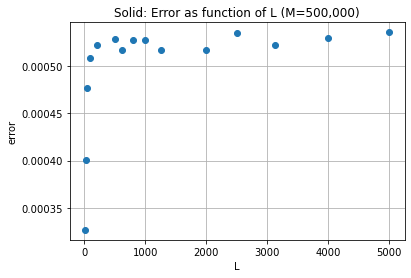

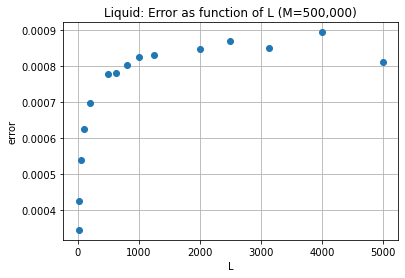

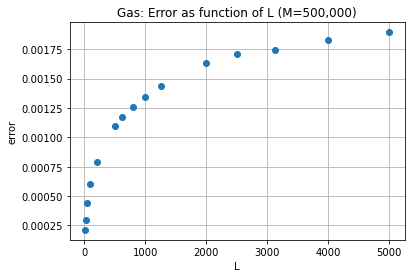

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#error function
def err(x, M, L):
    N=(int) (M/L)
    accu=0
    sum=0
    sum2=0
    for i in range(N):
        accu=0
        for j in range(L):
            accu += x[L*i+j]
        sum += accu/L
        sum2 += (accu/L)**2
    return sqrt( (sum2/N) - (sum/N)**2 ) / sqrt(N-1)

M = 500000
L = [10, 20, 50, 100, 200, 500, 625, 800, 1000, 1250, 2000, 2500, 3125 ,4000, 5000]
Error = np.zeros(np.size(L))

#solid
n, U = np.loadtxt("data/epot_solid.dat", usecols =(0, 1), unpack = 'true')
for i in range(np.size(L)): 
    Error[i] = err(U,M,L[i])
plt.plot(L,Error, 'o')
plt.xlabel('L')
plt.ylabel('error')
plt.title('Solid: Error as function of L (M=500,000)')
plt.grid(True)
plt.figure()

#liquid
n, U = np.loadtxt("data/epot_liquid.dat", usecols =(0, 1), unpack = 'true')
for i in range(np.size(L)): 
    Error[i] = err(U,M,L[i])
plt.plot(L,Error, 'o')
plt.xlabel('L')
plt.ylabel('error')
plt.title('Liquid: Error as function of L (M=500,000)')
plt.grid(True)
plt.figure()

#gas
n, U = np.loadtxt("data/epot_gas.dat", usecols =(0, 1), unpack = 'true')
for i in range(np.size(L)): 
    Error[i] = err(U,M,L[i])
plt.plot(L,Error, 'o')
plt.xlabel('L')
plt.ylabel('error')
plt.title('Gas: Error as function of L (M=500,000)')
plt.grid(True)

plt.show()

## <span style="color:blue">Exercise 07.3</span>

Again, the exercise is just an integration into the C++ MD/MC code (radial distribution function).

## <span style="color:blue">Exercise 07.4</span>

###### SIMULATION

I perform, for each of the three states (gas, liquid, solid), an MC simulation and an MD simulation of $N=50$ blocks of $L=2000$ steps (after waiting for the respective equilibration times), to compare the data obtained with the two methods.
Compared with exercise 4, the MD simulation has additional tail corrections and radial distribution function.

For each of the three steps, I made three graphs: 
- estimation of $U/N_{part}$ as a function of the progressive number of blocks, with relative uncertainty (compared with MD simulation)
- estimation of $P$ as a function of the progressive number of blocks, with relative uncertainty (compared with MD simulation)
- plot of $g(r)$ for chosen points, with relative uncertainty (no progressive estimation but only final value) and comparison with $g(r)$ given by MD simulation.

All the plots are in SI units (Argon: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K,  $m=39.948$ amu).

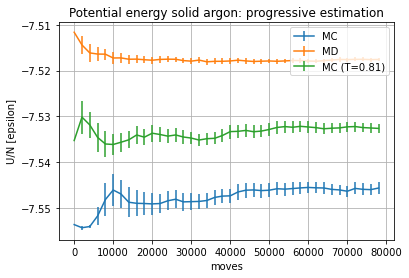

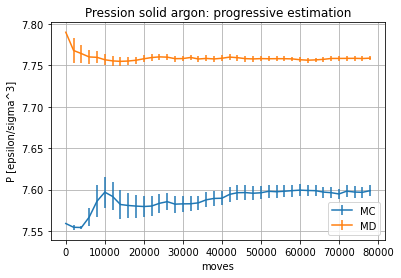

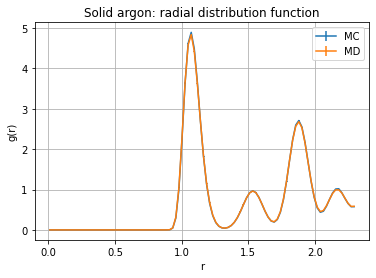

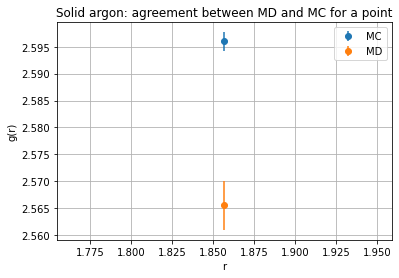

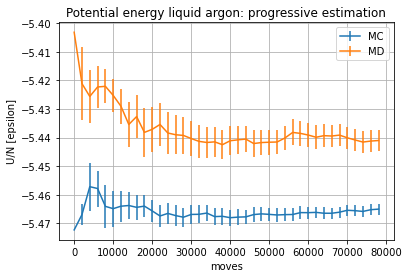

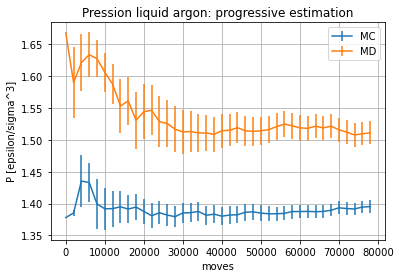

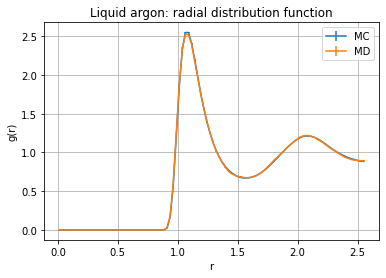

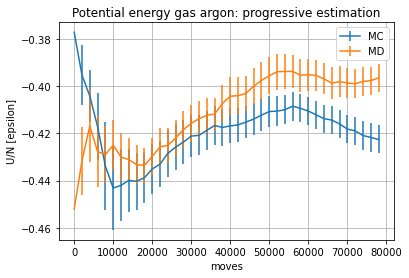

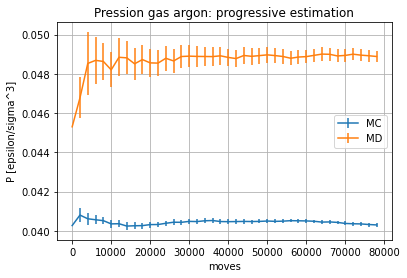

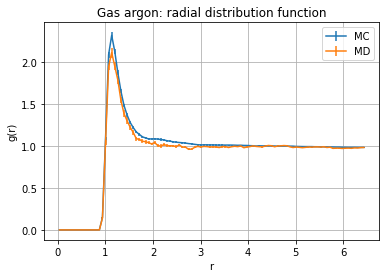

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N=40
L=2000
x=np.arange(N)*L

#solid
n, stima, sum_prog, err_prog = np.loadtxt("data/MC_epot_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_epot_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
n, stima, sum_prog, err_prog = np.loadtxt("data/MC2_epot_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC (T=0.81)')
plt.xlabel('moves')
plt.ylabel('U/N [epsilon]')
plt.title('Potential energy solid argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

n, stima, sum_prog, err_prog = np.loadtxt("data/MC_press_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_press_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
plt.xlabel('moves')
plt.ylabel('P [epsilon/sigma^3]')
plt.title('Pression solid argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

r, g, err_g = np.loadtxt("data/MC_g_solid.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MC')
r, g, err_g = np.loadtxt("data/MD_g_solid.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Solid argon: radial distribution function')
plt.grid(True)
plt.legend()
plt.figure()

r, g, err_g = np.loadtxt("data/MC_g_solid.dat", usecols =(0, 1, 2), unpack = 'true')
r=r[80:81]
g=g[80:81]
err_g=err_g[80:81]
plt.errorbar(r,g,yerr=err_g, label='MC', fmt='o')
r, g, err_g = np.loadtxt("data/MD_g_solid.dat", usecols =(0, 1, 2), unpack = 'true')
r=r[80:81]
g=g[80:81]
err_g=err_g[80:81]
plt.errorbar(r,g,yerr=err_g,label='MD', fmt='o')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Solid argon: agreement between MD and MC for a point')
plt.grid(True)
plt.legend()
plt.figure()

#liquid
n, stima, sum_prog, err_prog = np.loadtxt("data/MC_epot_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_epot_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
plt.xlabel('moves')
plt.ylabel('U/N [epsilon]')
plt.title('Potential energy liquid argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

n, stima, sum_prog, err_prog = np.loadtxt("data/MC_press_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_press_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
plt.xlabel('moves')
plt.ylabel('P [epsilon/sigma^3]')
plt.title('Pression liquid argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

r, g, err_g = np.loadtxt("data/MC_g_liquid.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MC')
r, g, err_g = np.loadtxt("data/MD_g_liquid.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Liquid argon: radial distribution function')
plt.grid(True)
plt.legend()
plt.figure()

#gas
n, stima, sum_prog, err_prog = np.loadtxt("data/MC_epot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_epot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
plt.xlabel('moves')
plt.ylabel('U/N [epsilon]')
plt.title('Potential energy gas argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

n, stima, sum_prog, err_prog = np.loadtxt("data/MC_press_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MC')
n, stima, sum_prog, err_prog = np.loadtxt("data/MD_press_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='MD')
plt.xlabel('moves')
plt.ylabel('P [epsilon/sigma^3]')
plt.title('Pression gas argon: progressive estimation')
plt.grid(True)
plt.legend()
plt.figure()

r, g, err_g = np.loadtxt("data/MC_g_gas.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MC')
r, g, err_g = np.loadtxt("data/MD_g_gas.dat", usecols =(0, 1, 2), unpack = 'true')
plt.errorbar(r,g,yerr=err_g, label='MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Gas argon: radial distribution function')
plt.grid(True)
plt.legend()
plt.figure()


plt.show()

###### CONCLUSIONS

The agreement between the radial distribution functions of the MC and MD simulations seems remarkable: virtually the same plot is obtained with the two methods.
 In fact, if one zooms in on a point at a fixed r (as I did for the solid), one notices that the points, with their respective error bars, are not compatible.

The incompatibility argument can also be extended to potential energy and pressure, where it is clear from the plots that MC and MD converge to slightly different values.

The reason probably lies in the role of temperature in the MD and MC simulations. 
In MC, temperature is a parameter, which governs the Boltzmann statistic, and represents the "severity" with which moves are accepted. Once set initially, it is not changed.
In MD, temperature is not a parameter, but a physical observable related to the measurement of mean square velocity, which is an evolving quantity (for MC, there are no velocities: we move according to configurations!).
To equilibrate an MD simulation, one must choose, by trial and error, the starting temperature such that at equilibrium the system reaches the temperature with which one wants to simulate. This choice is delicate, and subject to error. If you look at exercise 04.2, for example, for the solid phase, the temperature at equilibrium was not 0.8 as required but was about 0.806.

To make it clear how this fact can explain the incompatibility found in the present exercise, I have plotted (only for the potential energy of the solid) the results of an MC simulation working at T=0.81 instead of T=0.80. As can be seen, with this small variation the two MC simulations give incompatible results.  If one were to do a very precise analysis on the equilibrium temperature of the MD simulation and set it in the MC, one would perhaps get compatible results.